<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/CNN_classification_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/MyungKyuYi/AI-class/blob/main/5.%20CNN_breast_cancer.ipynb

# Introduction
**Dataset: [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)**  

**Framework**  
* TensorFlow: Version `2.17.0`

**Dependencies**  
* Python: Version `3.10.12`
* Numpy: Version `1.26.4`
* Pandas: Version `2.1.4`

# CNN

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
from google.colab import files

uploaded = files.upload()

Saving breast_cancer.csv to breast_cancer.csv


In [4]:
df = pd.read_csv('./breast_cancer.csv')
df

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [11]:
# check the missing value
df.isnull().sum()

# cf. 다음과 같이 features 수가 많은 경우에는,
# 먼저 전체 features에서의 missing value count를 할 수 있음.
# df.isnull().sum().sum() # output: 0

,0
Unnamed: 0,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0


In [13]:
# label의 values 확인
pd.unique(df['label'])

array([0, 1])

In [16]:
df.info()

# Unnamed: 0이라는 수상한 column확인됨
# 위에서 index column임을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [17]:
# drop the index column
df = df.drop('Unnamed: 0', axis=1)

# 사전에 index column 존재 여부를 알았다면 다음과 같이 처리 가능
# df = pd.read_csv('~~path', index_col=0)

In [18]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


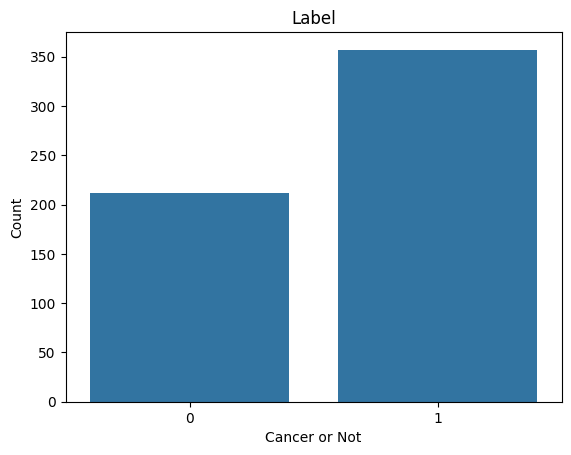

In [20]:
# label count by graph
sns.countplot(data=df, x='label')
plt.xlabel('Cancer or Not')
plt.ylabel('Count')
plt.title('Label')
plt.show()

In [21]:
# label count by numeric
df['label'].value_counts()

,count
label,
1,357
0,212


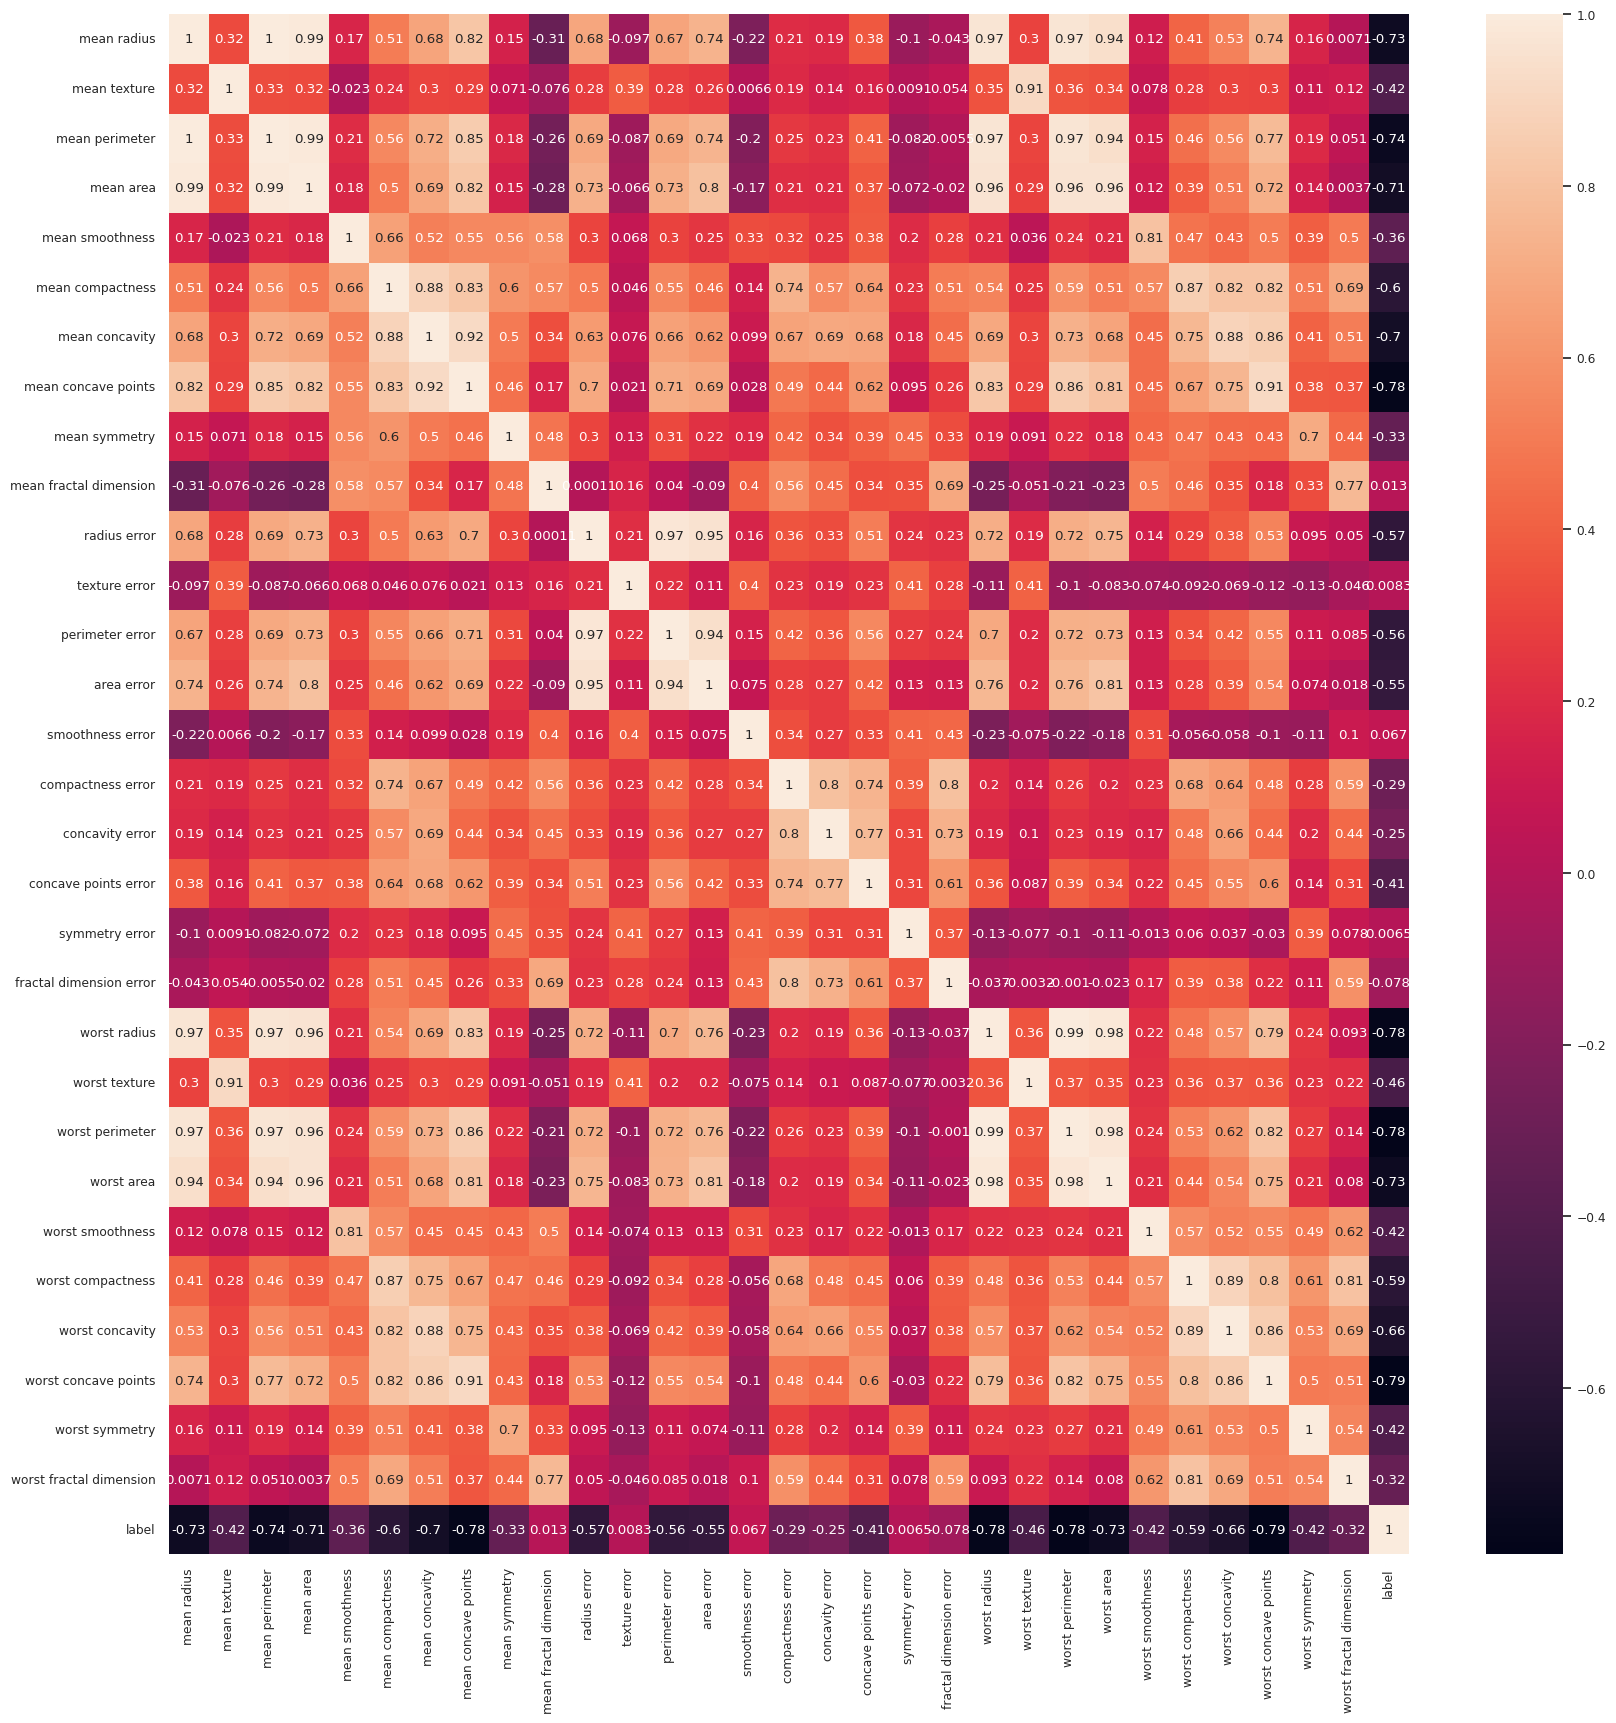

In [24]:
# check the correlation by heatmap
df_corr = df.corr()
plt.figure(figsize=(20, 20))
# sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True)
plt.show()

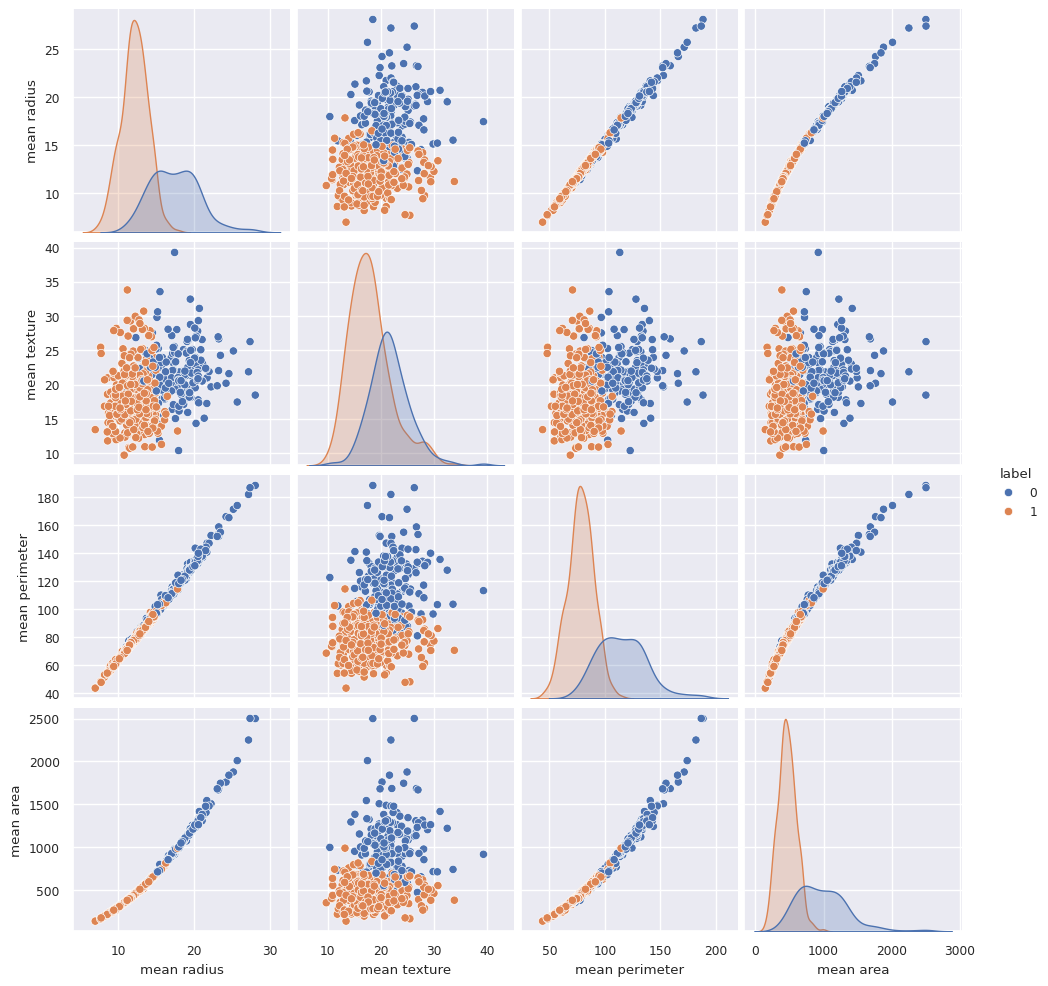

In [42]:
# check the corrleation by pairplot
# features가 많아서 4개씩 끊어서 확인
sns.pairplot(df,
             vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'],
             hue='label')
plt.show()

# 위 heatmap과 비교하면 mean radius, ..., mean area는
# label과의 correlation <= -0.3으로, negative correlation임.
# 따라서 mean radius, ..., mean area의 값이 "작을수록" label=1인 경향을 띔
# 이를 pairplot에서도 확인 가능

In [46]:
# cf. 해당 색상들이 순서대로 부여됨 즉, blue=>label 0이고 orange=>label 1
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [47]:
# cf. features list
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [73]:
X = df.drop('label', axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [74]:
y = df['label']
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=42)

In [79]:
print(f'Shape: X_train {X_train.shape}, Shape: X_test {X_test.shape}')

Shape: X_train (512, 30), Shape: X_test (57, 30)


In [80]:
def split_sequences(sequences, n_steps):
    X = []
    y = []
    for i in range(len(sequences)):
        end_idx = i + n_steps
        if end_idx > len(sequences): break
        seq_x = sequences[i:end_idx, :-1] # features
        seq_y = sequences[end_idx-1, -1] # label
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [81]:
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

In [82]:
test_set

array([[1.445e+01, 2.022e+01, 9.449e+01, ..., 4.753e-01, 1.013e-01,
        0.000e+00],
       [1.126e+01, 1.996e+01, 7.372e+01, ..., 2.955e-01, 7.009e-02,
        1.000e+00],
       [1.380e+01, 1.579e+01, 9.043e+01, ..., 2.589e-01, 1.030e-01,
        0.000e+00],
       ...,
       [2.016e+01, 1.966e+01, 1.311e+02, ..., 3.055e-01, 5.933e-02,
        0.000e+00],
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 2.454e-01, 8.136e-02,
        1.000e+00],
       [1.346e+01, 1.875e+01, 8.744e+01, ..., 3.518e-01, 8.665e-02,
        1.000e+00]])

In [83]:
X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

(508, 5, 30) (508,)


In [98]:
X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)

(53, 5, 30) (53,)


In [88]:
X_train[0]

array([[1.499e+01, 2.211e+01, 9.753e+01, 6.937e+02, 8.515e-02, 1.025e-01,
        6.859e-02, 3.876e-02, 1.944e-01, 5.913e-02, 3.186e-01, 1.336e+00,
        2.310e+00, 2.851e+01, 4.449e-03, 2.808e-02, 3.312e-02, 1.196e-02,
        1.906e-02, 4.015e-03, 1.676e+01, 3.155e+01, 1.102e+02, 8.671e+02,
        1.077e-01, 3.345e-01, 3.114e-01, 1.308e-01, 3.163e-01, 9.251e-02],
       [1.989e+01, 2.026e+01, 1.305e+02, 1.214e+03, 1.037e-01, 1.310e-01,
        1.411e-01, 9.431e-02, 1.802e-01, 6.188e-02, 5.079e-01, 8.737e-01,
        3.654e+00, 5.970e+01, 5.089e-03, 2.303e-02, 3.052e-02, 1.178e-02,
        1.057e-02, 3.391e-03, 2.373e+01, 2.523e+01, 1.605e+02, 1.646e+03,
        1.417e-01, 3.309e-01, 4.185e-01, 1.613e-01, 2.549e-01, 9.136e-02],
       [1.048e+01, 1.986e+01, 6.672e+01, 3.377e+02, 1.070e-01, 5.971e-02,
        4.831e-02, 3.070e-02, 1.737e-01, 6.440e-02, 3.719e-01, 2.612e+00,
        2.517e+00, 2.322e+01, 1.604e-02, 1.386e-02, 1.865e-02, 1.133e-02,
        3.476e-02, 3.560e-03, 1.148e

In [89]:
X_train[1]

array([[1.989e+01, 2.026e+01, 1.305e+02, 1.214e+03, 1.037e-01, 1.310e-01,
        1.411e-01, 9.431e-02, 1.802e-01, 6.188e-02, 5.079e-01, 8.737e-01,
        3.654e+00, 5.970e+01, 5.089e-03, 2.303e-02, 3.052e-02, 1.178e-02,
        1.057e-02, 3.391e-03, 2.373e+01, 2.523e+01, 1.605e+02, 1.646e+03,
        1.417e-01, 3.309e-01, 4.185e-01, 1.613e-01, 2.549e-01, 9.136e-02],
       [1.048e+01, 1.986e+01, 6.672e+01, 3.377e+02, 1.070e-01, 5.971e-02,
        4.831e-02, 3.070e-02, 1.737e-01, 6.440e-02, 3.719e-01, 2.612e+00,
        2.517e+00, 2.322e+01, 1.604e-02, 1.386e-02, 1.865e-02, 1.133e-02,
        3.476e-02, 3.560e-03, 1.148e+01, 2.946e+01, 7.368e+01, 4.028e+02,
        1.515e-01, 1.026e-01, 1.181e-01, 6.736e-02, 2.883e-01, 7.748e-02],
       [1.218e+01, 2.052e+01, 7.722e+01, 4.587e+02, 8.013e-02, 4.038e-02,
        2.383e-02, 1.770e-02, 1.739e-01, 5.677e-02, 1.924e-01, 1.571e+00,
        1.183e+00, 1.468e+01, 5.080e-03, 6.098e-03, 1.069e-02, 6.797e-03,
        1.447e-02, 1.532e-03, 1.334e

In [85]:
y_train

array([0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1.

In [110]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [91]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [92]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [93]:
input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(2, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 5, 30)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 3, 64)               │           5,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,306 (71.51 KB)

 Trainable params: 18,306 (71.51 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5882 - loss: 22.1446 - val_accuracy: 0.8431 - val_loss: 7.3173
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8152 - loss: 3.8317 - val_accuracy: 0.8627 - val_loss: 5.5050
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8553 - loss: 2.3592 - val_accuracy: 0.8039 - val_loss: 6.6013
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8488 - loss: 2.2366 - val_accuracy: 0.8431 - val_loss: 3.1019
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8197 - loss: 1.7290 - val_accuracy: 0.8824 - val_loss: 2.7642
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8803 - loss: 1.1777 - val_accuracy: 0.7059 - val_loss: 7.2232
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8362 - loss: 2.4858 - val_accuracy: 0.8627 - val_loss: 3.2542
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8548 - loss: 1.2943 - val_accuracy: 0.8235 - val_los

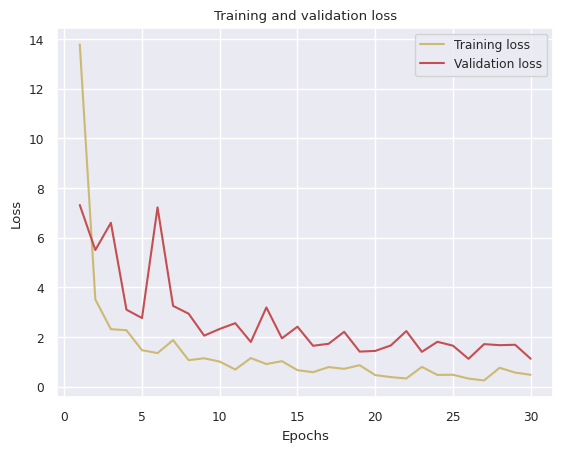

In [95]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

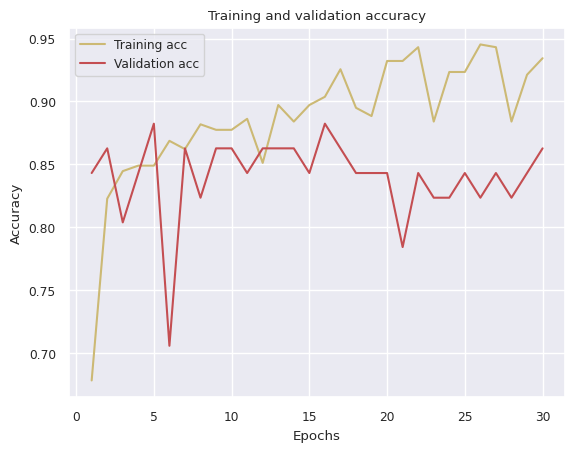

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [112]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [113]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.94      0.89      0.91        35

    accuracy                           0.89        53
   macro avg       0.87      0.89      0.88        53
weighted avg       0.89      0.89      0.89        53

